MNIST 数据库官方网址为：http://yann.lecun.com/exdb/mnist/
    
也可以直接下载train-images-idx3-ubyte.gz、 train-labels-idxl-ubyte.gz等文件


###  数据解析
TensorFlow 2.0中的MNIST数据集为压缩的图像数据，解析MNIST数据集使用Keras 高层封装的接口，TensorFlow 2.0的MNIST数据集包括训练集和数据集两部分。

(28, 28, 1)
训练图像数据集尺寸:(60000, 28, 28)
训练图像数量:60000
第一个训练标签数据:5
测试数据集尺寸:(10000, 28, 28)
测试图像数量:60000
第一个测试标签数据:7


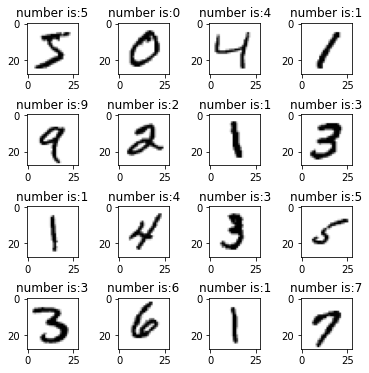

In [1]:
import tensorflow as tf  # 引入Tensorflow框架
from tensorflow import keras  # 引入keras框架
from tensorflow.keras import layers # 引入keras层结构
import numpy as np  # 引入数据处理模块
import matplotlib.pyplot as plt # 引入图像处理模块
def images_show(train_images, train_labels):
    """参数
    train_images: 训练数据
    train_labels: 训练数据标签
    返回: 无
    """
    # 打开绘图区
    plt.figure(figsize=(6,6))
    # 绘制前16个图像
    for i in range(16):
        # 图像矩阵数据
        train_data_value = train_images[i]
        # 图像标签数据
        train_label_value = train_labels[i]
        # 调整图像尺寸
        train_image_reshape = train_data_value.reshape((28, 28, -1))
        # 绘图区分区
        plt.subplot(4,4,i+1)
        plt.subplots_adjust(wspace=0.5, hspace=0.8)
        # plt.imshow(train_image_reshape[:,:,0], cmap="Greys_r")
        # 图像写入绘图区
        plt.imshow(train_data_value, cmap=plt.cm.binary)
        # 添加图像标题
        plt.title(f"number is:{train_label_value}")
        # print("data i: {}".format(i))
    plt.savefig("./image/train_image_show.png", format="png", dpi=500)
    plt.show()
if __name__=="__main__":
    mnist = keras.datasets.mnist      # 引入MNIST数据集  
    # 提取数据集数据
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    print(train_images[0].reshape((28, 28, 1)).shape)
    print("训练图像数据集尺寸:{}".format(train_images.shape))
    print("训练图像数量:{}".format(len(train_images)))
    print("第一个训练标签数据:{}".format(train_labels[0]))
    print("测试数据集尺寸:{}".format(test_images.shape))
    print("测试图像数量:{}".format(len(train_images)))
    print("第一个测试标签数据:{}".format(test_labels[0]))
    images_show(train_images,train_labels)


# 编程实战

### 1、数据的获取和处理

可以使用TensorFlow 2.0自带的数据获取方式获得 MNIST 数据集并进行处理，代码如下：

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

对于TensorFlow 2.0来说，它提供常用API并收集整理一些数据集，为模型的编写和验证带来了最大限度的方便。建议读者选择自带的API，因为大多数自带的 API，在底层都会做一定程度的优化，调用不同的库包去最大效率地实现功能

通过TensorFlow提供的读取工具，获取图像和标签后，还需要将数据集的原始数据28×28×1的RGB图像数据，即图像宽为28px，高度为28px，通道数为1，使用占位符转换成一个四维数据[None, 28,28,1]，该维度数据为TensorFlow使用的标淮数据。

In [2]:
'''
#设置GPU
#如果使用的是CPU可以注释掉这部分的代码。
import tensorflow as tf  # 引入Tensorflow框架
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpus[0]],"GPU")
'''

'\n#设置GPU\n#如果使用的是CPU可以注释掉这部分的代码。\nimport tensorflow as tf  # 引入Tensorflow框架\ngpus = tf.config.list_physical_devices("GPU")\n\nif gpus:\n    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用\n    tf.config.set_visible_devices([gpus[0]],"GPU")\n'

In [3]:
#导入相关模块
import tensorflow as tf
from tensorflow import keras  # 引入keras框架
from tensorflow.keras import layers # 引入keras层结构
import numpy as np  # 引入数据处理模块
import matplotlib.pyplot as plt # 引入图像处理模块
from datetime import datetime
def get_datas():
    # 读取MNIST数据集
    (train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
    # 获取前1000个图像数据
    train_labels = train_labels[:1000]
    # 获取前1000个评估使用图像
    eval_images = train_images[:1000]
    # 调整图像数据维度，供训练使用
    train_images = train_images[:1000].reshape(-1, 28,28,1)/255.0
    return train_images, train_labels, eval_images

### 2、搭建卷积神经网络
以AlexNet模型创建为例，采用Sequential外置搭建神经网络的方法进行

In [4]:
def create_model():
    #使用keras新建神经网络
    model = tf.keras.Sequential(name="MNIST-CNN")
    # 卷积层-1
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),name="conv1",input_shape=(28,28,1),activation="relu",padding="same"))
    # 最大池化层-1
    model.add(layers.MaxPooling2D((2,2),strides=2,name="pooling1"))
    # 卷积层-2
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),name="conv2",activation="relu",padding="same"))
    # 最大池化层-2
    model.add(layers.MaxPooling2D((2,2),strides=2,name="pooling2"))
    #卷积层-3
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),name="conv3",activation="relu",padding="same"))
    #卷积层-4
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),name="conv4",activation="relu",padding="same"))            
    #卷积层-5
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),name="conv5",activation="relu",padding="same"))
    #最大池化层-3
    model.add(layers.MaxPooling2D((2,2),strides=2,name="pooling3"))
    #全连接层-1
    model.add(layers.Flatten (name="flatten"))
    model.add(layers.Dense(units=288,activation=tf.nn.relu,name="fc1"))

    #全连接层-2
    model.add(layers.Dense(units=144,activation=tf.nn.relu,name="fc2"))
    #dropout操作
    model.add(layers.Dropout(rate=0.5))
    
    #全连接层-3
   
    model.add(layers.Dense(units=72,activation=tf.nn.relu,name="fc3"))
    #dropout操作
    model.add(layers.Dropout(rate=0.5))
    
    #全连接层-4
    model.add(layers.Dense(units=10,activation=tf.nn.relu,name="fc4"))

    # 配置损失计算及优化器
    compile_model(model)
    return model

In [5]:
def compile_model(model):
    model.compile(
        #损失函数优化器——Adam优化器
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        #损失函数——交叉熵函数
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"] #测量值
    )

In [6]:
def display_nn_structure(model, nn_structure_path):
    #展示神经网络结构
    model.summary()
    keras.utils.plot_model(model, nn_structure_path, show_shapes=True)


In [7]:
def train_model(model, inputs, outputs, model_path):
    #训练神经网络
    history = model.fit(
            inputs, 
            outputs,  
            batch_size=64, 
            epochs=10, 
            verbose=1 
            )
    model.save_weights(model_path+'cnn.ckpt')

In [8]:
def load_model(model, model_path):    # 载入模型
    model.load_weights(model_path+'cnn.ckpt')

In [9]:
def prediction(model, model_path, inputs):
    # 载入模型
    load_model(model, model_path)
    # 预测值
    pres = model.predict(inputs)
    print("prediction:{}".format(pres))
    # 返回预测值
    return pres


In [10]:
def plot_prediction(model, model_path, inputs, evals):
    #可视化预测结果     
    pres = prediction(model, model_path, inputs)  # 预测值
    pres = tf.math.argmax(pres, 1)
    for i in range(4):
        plt.subplot(4,4,i+1)
        plt.subplots_adjust(wspace=0.5, hspace=0.8)
        plt.imshow(evals[i], cmap=plt.cm.binary)
        plt.title("predict:{}".format(pres[i]))
    plt.savefig("./image/cnn-pre.png", format="png", dpi=300)
    plt.show()


./mnist_cnn/models
Epoch 1/10
16/16 [==============================] - 5s 104ms/step - loss: 2.3002 - accuracy: 0.1070
Epoch 2/10
16/16 [==============================] - 2s 111ms/step - loss: 2.2478 - accuracy: 0.1490
Epoch 3/10
16/16 [==============================] - 2s 99ms/step - loss: 2.0257 - accuracy: 0.3030
Epoch 4/10
16/16 [==============================] - 2s 105ms/step - loss: 1.6443 - accuracy: 0.4550
Epoch 5/10
16/16 [==============================] - 2s 117ms/step - loss: 1.3152 - accuracy: 0.5880
Epoch 6/10
16/16 [==============================] - 2s 118ms/step - loss: 1.1152 - accuracy: 0.6350
Epoch 7/10
16/16 [==============================] - 2s 115ms/step - loss: 0.9132 - accuracy: 0.7410
Epoch 8/10
16/16 [==============================] - 2s 117ms/step - loss: 0.7564 - accuracy: 0.7620
Epoch 9/10
16/16 [==============================] - 2s 113ms/step - loss: 0.6890 - accuracy: 0.7940
Epoch 10/10
1/1 [==============================] - 1s 594ms/step
prediction:[[ 0.6

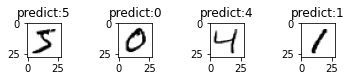

In [11]:
if __name__=="__main__":
    model_path="./mnist_cnn/models"
    print(model_path)
    mnist = keras.datasets.mnist      # 引入MNIST数据集  
    # 提取数据集数据
    inputs, outputs, evals =get_datas()
    model=create_model()
    # display_nn_structure(model,"./image/mnist_alexnet.png")
    train_model(model,inputs,outputs,model_path)
    plot_prediction(model,model_path,inputs[:4],evals[:4]) #预测前4张图像

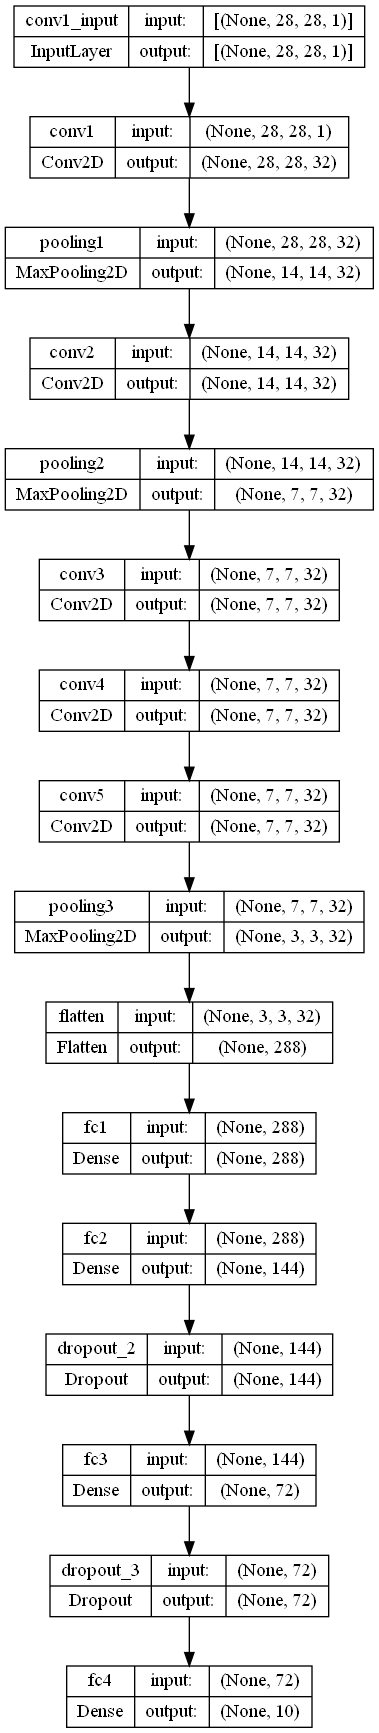

In [12]:
y=create_model()
y.summary

from tensorflow.keras.utils import plot_model
plot_model(y, to_file='DResLayer_model.png', show_shapes=True)